In [1]:
from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir('drive/My Drive/GAN_in_art-museum')

# !pip install -r requirements.txt

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
from keras.datasets import mnist
from models.AE2 import Autoencoder

# 실행 매개변수
SECTION = 'vae'
RUN_ID = '0001'
DATA_NAME = 'digits'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir('run')
    os.mkdir('run/{}' .format(SECTION))
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

MODE =  'build' #'load' #

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
import numpy as np

x_train = x_train.astype('float32') / 255.
x_train = x_train.reshape(x_train.shape + (1,))
x_test = x_test.astype('float32') / 255.
x_test = np.expand_dims(x_test, axis = -1)

In [5]:
AE = Autoencoder(
    input_dim = (28, 28, 1),
    encoder_conv_filters = [32, 64, 64, 64],
    encoder_conv_kernel_size = [3, 3, 3, 3],
    encoder_conv_strides = [1, 2, 2, 1],
    decoder_conv_t_filters = [64, 64, 32, 1],
    decoder_conv_t_kernel_size = [3,3,3,3],
    decoder_conv_t_strides = [1,2,2,1],
    z_dim = 2
)

if MODE == 'build':
  AE.save(RUN_FOLDER)
else:
  AE.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [10]:
AE.encoder.summary()

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   (None, 28, 28, 1)         0         
_________________________________________________________________
encoder_conv_0 (Conv2D)      (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
encoder_conv_1 (Conv2D)      (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
encoder_conv_2 (Conv2D)      (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_15 (LeakyReLU)   (None, 7, 7, 64)          0  

In [11]:
AE.decoder.summary()

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   (None, 2)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 3136)              9408      
_________________________________________________________________
reshape_3 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
decoder_conv_t_0 (Conv2DTran (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 7, 7, 64)          0         
_________________________________________________________________
decoder_conv_t_1 (Conv2DTran (None, 14, 14, 64)        36928     
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 14, 14, 64)        0  

In [6]:
# training

LEARNING_RATE = 0.0005
BATCH_SIZE = 32
INITIAL_EPOCH = 0

AE.compile(LEARNING_RATE)

In [7]:
history=AE.train(
    x_train,
    batch_size = BATCH_SIZE,
    epochs = 200,
    run_folder = RUN_FOLDER,
    initial_epoch = INITIAL_EPOCH
)

Epoch 1/200
  800/60000 [..............................] - ETA: 9:02 - loss: 0.2032 

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.423981). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


60000/60000 [==============================] - 23s 390us/step - loss: 0.0554

Epoch 00001: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 2/200
60000/60000 [==============================] - 12s 207us/step - loss: 0.0461

Epoch 00002: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 3/200
60000/60000 [==============================] - 13s 210us/step - loss: 0.0441

Epoch 00003: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 4/200
60000/60000 [==============================] - 13s 210us/step - loss: 0.0431

Epoch 00004: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 5/200
60000/60000 [==============================] - 13s 209us/step - loss: 0.0424

Epoch 00005: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 6/200
  832/60000 [..............................] - ETA: 20s - loss: 0.0416

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.121679). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


60000/60000 [==============================] - 13s 214us/step - loss: 0.0419

Epoch 00006: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 7/200
60000/60000 [==============================] - 12s 208us/step - loss: 0.0415

Epoch 00007: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 8/200
60000/60000 [==============================] - 12s 208us/step - loss: 0.0412

Epoch 00008: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 9/200
60000/60000 [==============================] - 12s 208us/step - loss: 0.0409

Epoch 00009: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 10/200
60000/60000 [==============================] - 13s 210us/step - loss: 0.0407

Epoch 00010: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 11/200
60000/60000 [==============================] - 12s 208us/step - loss: 0.0405

Epoch 00011: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 12/200
60000/60000 [==============================] - 12

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.150873). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


60000/60000 [==============================] - 13s 212us/step - loss: 0.0358

Epoch 00157: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 158/200
60000/60000 [==============================] - 12s 207us/step - loss: 0.0358

Epoch 00158: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 159/200
60000/60000 [==============================] - 12s 204us/step - loss: 0.0358

Epoch 00159: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 160/200
60000/60000 [==============================] - 12s 205us/step - loss: 0.0358

Epoch 00160: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 161/200
60000/60000 [==============================] - 13s 210us/step - loss: 0.0358

Epoch 00161: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 162/200
60000/60000 [==============================] - 13s 213us/step - loss: 0.0358

Epoch 00162: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 163/200
60000/60000 [===========================

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.149930). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


60000/60000 [==============================] - 12s 208us/step - loss: 0.0357

Epoch 00169: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 170/200
60000/60000 [==============================] - 12s 207us/step - loss: 0.0357

Epoch 00170: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 171/200
60000/60000 [==============================] - 12s 207us/step - loss: 0.0357

Epoch 00171: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 172/200
60000/60000 [==============================] - 12s 207us/step - loss: 0.0357

Epoch 00172: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 173/200
60000/60000 [==============================] - 12s 203us/step - loss: 0.0357

Epoch 00173: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 174/200
60000/60000 [==============================] - 12s 205us/step - loss: 0.0357

Epoch 00174: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 175/200
  864/60000 [...........................

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.149213). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


60000/60000 [==============================] - 12s 208us/step - loss: 0.0357

Epoch 00175: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 176/200
60000/60000 [==============================] - 12s 205us/step - loss: 0.0357

Epoch 00176: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 177/200
60000/60000 [==============================] - 12s 206us/step - loss: 0.0357

Epoch 00177: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 178/200
60000/60000 [==============================] - 12s 205us/step - loss: 0.0357

Epoch 00178: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 179/200
60000/60000 [==============================] - 12s 206us/step - loss: 0.0357

Epoch 00179: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 180/200
60000/60000 [==============================] - 12s 207us/step - loss: 0.0356

Epoch 00180: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 181/200
60000/60000 [===========================

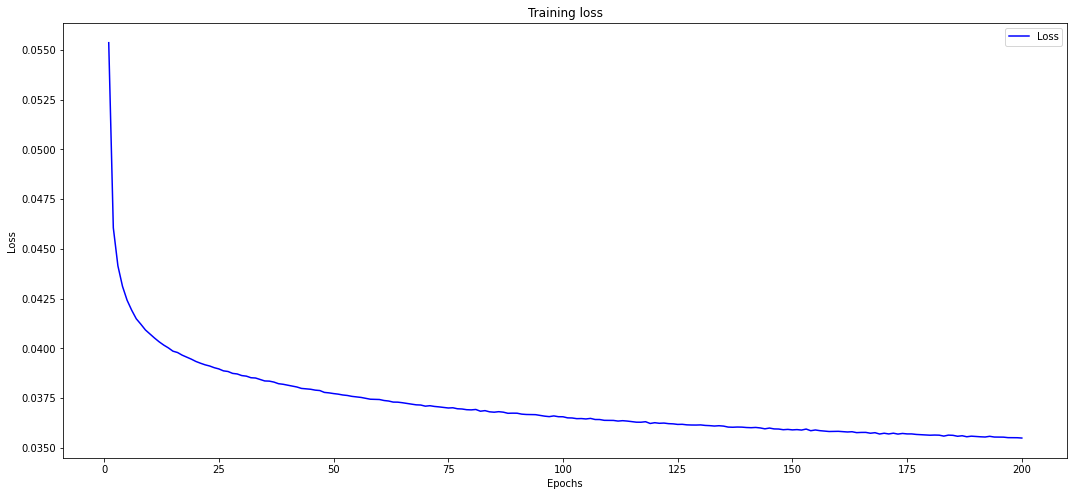

In [13]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label = 'Loss')

plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()